<a href="https://colab.research.google.com/github/Meyssemmedini/MeriSKILL-projects/blob/main/Sales_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Loading

In [ ]:
#data mounting
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#imprt packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
#read data
df = pd.read_csv ('/content/drive/MyDrive/Meriskill/Project 1 - Sales Data Analysis/Sales Data.csv')

#Step 1 : Data Cleaning

In [ ]:
#explore the data
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [ ]:
#Data Dimension
df.shape

(185950, 11)

In [ ]:
# Check for dubplicated data
df.duplicated().sum()

0

In [ ]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [ ]:
# Check the df to see if there are missing values
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

In [ ]:
##checking and dealing inconsistent data type if needed
df.dtypes

Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
Sales               float64
City                 object
Hour                  int64
dtype: object

In [ ]:
#checking and dealing with inconsistencies in categorical values
object_cols = df.select_dtypes("object").columns
for column in object_cols:
  print(column, df[column].unique())

Product ['Macbook Pro Laptop' 'LG Washing Machine' 'USB-C Charging Cable'
 '27in FHD Monitor' 'AA Batteries (4-pack)' 'Bose SoundSport Headphones'
 'AAA Batteries (4-pack)' 'ThinkPad Laptop' 'Lightning Charging Cable'
 'Google Phone' 'Wired Headphones' 'Apple Airpods Headphones'
 'Vareebadd Phone' 'iPhone' '20in Monitor' '34in Ultrawide Monitor'
 'Flatscreen TV' '27in 4K Gaming Monitor' 'LG Dryer']
Order Date ['2019-12-30 00:01:00' '2019-12-29 07:03:00' '2019-12-12 18:21:00' ...
 '2019-06-09 22:07:00' '2019-06-26 18:35:00' '2019-06-25 14:33:00']
Purchase Address ['136 Church St, New York City, NY 10001'
 '562 2nd St, New York City, NY 10001'
 '277 Main St, New York City, NY 10001' ...
 '590 Wilson St, Los Angeles, CA 90001'
 '685 Hickory St, New York City, NY 10001'
 '209 11th St, Atlanta, GA 30301']
City [' New York City' ' San Francisco' ' Atlanta' ' Portland' ' Dallas'
 ' Los Angeles' ' Boston' ' Austin' ' Seattle']


In [ ]:
# Remove leading spaces from the 'City' column
df['City'] = df['City'].str.strip()


In [ ]:
#Cheking and dealing with inappropriate or unusual data points if needed
num_cols = df.select_dtypes("number").columns
df[num_cols].describe()

,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,230417.569379,1.124383,184.399735,7.059140,185.490917,14.413305
std,51512.737110,0.442793,332.731330,3.502996,332.919771,5.423416
min,141234.000000,1.000000,2.990000,1.000000,2.990000,0.000000
25%,185831.250000,1.000000,11.950000,4.000000,11.950000,11.000000
50%,230367.500000,1.000000,14.950000,7.000000,14.950000,15.000000
75%,275035.750000,1.000000,150.000000,10.000000,150.000000,19.000000
max,319670.000000,9.000000,1700.000000,12.000000,3400.000000,23.000000


In [ ]:
# Convert 'Order Date' to datetime type
df['Order Date'] = pd.to_datetime(df['Order Date'])
# Split 'order_date' into two columns: 'date' and 'time'
df['Date'] = df['Order Date'].dt.date
df['Time'] = df['Order Date'].dt.time
# Drop the 'Order Date' column
df = df.drop('Order Date', axis=1)

In [ ]:
df[['Month', 'Sales']]

,Month,Sales
0,12,1700.00
1,12,600.00
2,12,11.95
3,12,149.99
4,12,11.95
...,...,...
185945,6,2.99
185946,6,149.99
185947,6,11.95
185948,6,11.95


In [ ]:
df

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,Sales,City,Hour,Date,Time
0,295665,Macbook Pro Laptop,1,1700.00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,2019-12-30,00:01:00
1,295666,LG Washing Machine,1,600.00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,2019-12-29,07:03:00
2,295667,USB-C Charging Cable,1,11.95,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,2019-12-12,18:21:00
3,295668,27in FHD Monitor,1,149.99,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,2019-12-22,15:13:00
4,295669,USB-C Charging Cable,1,11.95,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,2019-12-18,12:38:00
...,...,...,...,...,...,...,...,...,...,...,...
185945,222905,AAA Batteries (4-pack),1,2.99,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19,2019-06-07,19:02:00
185946,222906,27in FHD Monitor,1,149.99,"495 North St, New York City, NY 10001",6,149.99,New York City,19,2019-06-01,19:29:00
185947,222907,USB-C Charging Cable,1,11.95,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18,2019-06-22,18:57:00
185948,222908,USB-C Charging Cable,1,11.95,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18,2019-06-26,18:35:00


#Step 2 Data Visualization

##Sales trend over time using the line chart

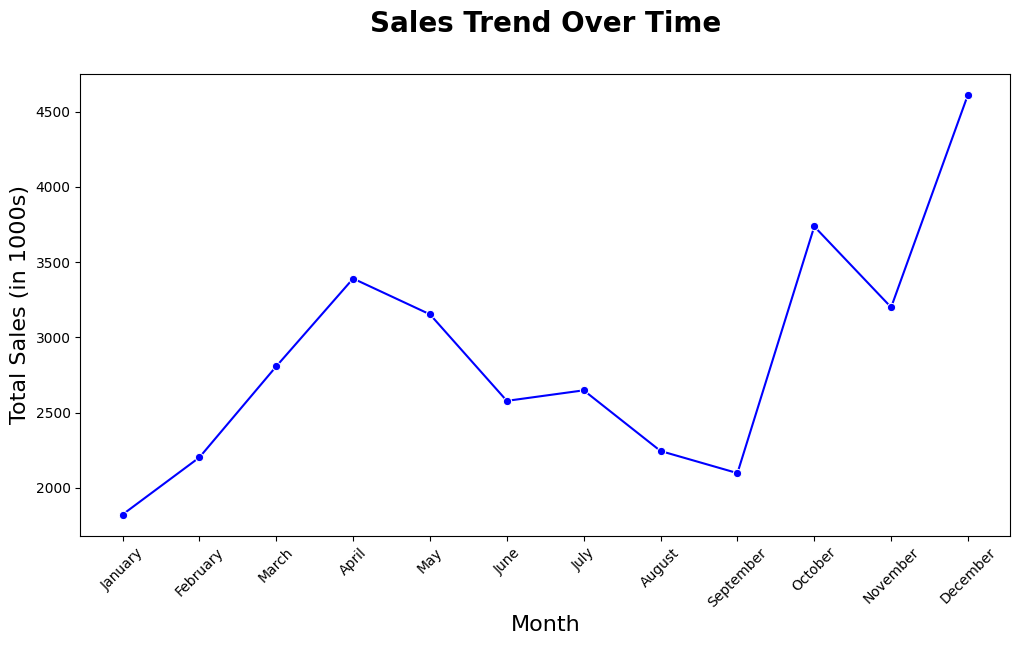

In [ ]:
import calendar

df['MonthName'] = df['Month'].apply(lambda x: calendar.month_name[x])

# Define the custom order for sorting
custom_order = list(calendar.month_name)[1:]

# Sort DataFrame based on the custom order
df['MonthName'] = pd.Categorical(df['MonthName'], categories=custom_order, ordered=True)
df = df.sort_values('MonthName')

# Group by month and calculate the sum of sales
monthly_sales = df.groupby('MonthName')['Sales'].sum().reset_index()
# Convert sales to thousands
monthly_sales['Sales (in 1000s)'] = monthly_sales['Sales'] / 1000
# Create a line chart using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='MonthName', y='Sales (in 1000s)', data=monthly_sales, marker='o', color='b',errorbar= None)
plt.title('Sales Trend Over Time', fontsize=20, fontweight='bold', color='black', pad=30)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Total Sales (in 1000s)', fontsize=16)
plt.xticks(rotation=45)

plt.show()


In [ ]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Purchase Address', 'Month', 'Sales', 'City', 'Hour', 'Date', 'Time',
       'MonthName'],
      dtype='object')

##Best selling products using tree map

In [ ]:
# Group by Product and calculate total sales for each product
product_sales = df.groupby('Product')['Sales'].sum().reset_index()

# Sort products by total sales in descending order
product_sales = product_sales.sort_values(by='Sales', ascending=False)

# Create a tree map using plotly
fig = px.treemap(product_sales,
                 path=['Product'],
                 values='Sales',
                 title='Best Selling Products',
                 color='Sales',
                 color_continuous_scale='viridis')

# Show the plot
fig.show()


##Top 5 best selling product using stacked bar chart

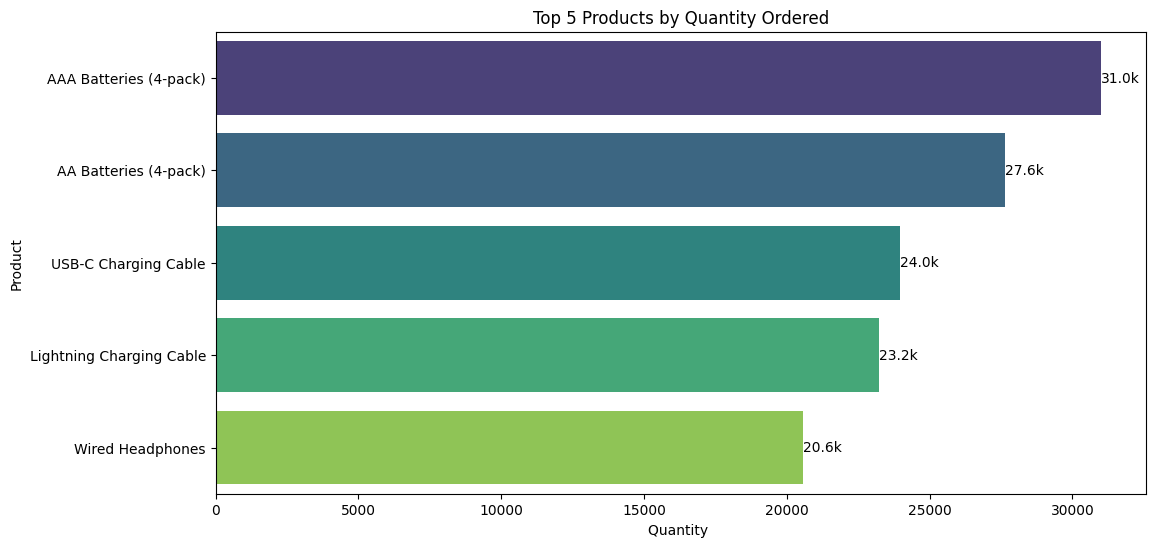

In [ ]:
# Group by Product and calculate total quantity ordered for each product
product_quantity = df.groupby('Product')['Quantity Ordered'].sum().reset_index()

# Sort products by total quantity ordered in descending order and select the top 5
top_products = product_quantity.sort_values(by='Quantity Ordered', ascending=False).head(5)

# Create a bar chart using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Quantity Ordered', y='Product', data=top_products,
            estimator=sum, errorbar=None, order=top_products['Product'], palette='viridis')

# Add annotations to the bars
for index, value in enumerate(top_products['Quantity Ordered']):
    plt.text(value + 1, index, f'{value/1000:.1f}k', va='center')

plt.title('Top 5 Products by Quantity Ordered')
plt.xlabel('Quantity ')
plt.ylabel('Product')
plt.show()


## Top 5 cities by sales using map



In [ ]:
df['City'].unique()

array(['San Francisco', 'Austin', 'Atlanta', 'New York City', 'Portland',
       'Los Angeles', 'Dallas', 'Boston', 'Seattle'], dtype=object)

In [ ]:
# Sample latitude and longitude coordinates
coordinates = {'New York City': (40.7128, -74.0060),
               'San Francisco': (37.7749, -122.4194),
               'Atlanta': (33.7490, -84.3880),
               'Portland': (45.5051, -122.6750),
               'Dallas': (32.7767, -96.7970),
               'Los Angeles': (34.0522, -118.2437),
               'Boston': (42.3601, -71.0589),
               'Austin': (30.2500, -97.7500),
               'Seattle': (47.6062, -122.3321)}

df['Latitude'], df['Longitude'] = zip(*df['City'].map(coordinates))

# Sort cities by total sales in descending order and select the top 5
top_cities = df.sort_values(by='Sales', ascending=False).drop_duplicates('City').head(5)

# Create a map using plotly express
fig = px.scatter_mapbox(top_cities,
                        lat='Latitude',
                        lon='Longitude',
                        color='Sales',
                        size='Sales',
                        hover_name='City',
                        title='Top 5 Cities by Sales in the USA',
                        mapbox_style='carto-positron',
                        zoom=2)

# Show the plot
fig.show()


##Weekly sales distribution by weekday using column chart


In [ ]:
# Convert 'Date' to datetime type
df['Date'] = pd.to_datetime(df['Date'])
Order_Date = pd.date_range('2023-01-01', '2023-12-31', freq='D')
# Extract weekday from 'Date'
df['Weekday'] = df['Date'].dt.day_name()
# Group by weekday and calculate total sales for each weekday
weekday_sales = df.groupby('Weekday')['Sales'].sum().reset_index()

# Order weekdays
weekdays_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_sales['Weekday'] = pd.Categorical(weekday_sales['Weekday'], categories=weekdays_order, ordered=True)
weekday_sales = weekday_sales.sort_values('Weekday')

# Create a column chart using plotly express
fig = px.bar(weekday_sales,
             x='Weekday',
             y='Sales',
             title='Weekly Sales Distribution by Weekday',
             labels={'Sales': 'Total Sales'},
             height=400)

# Show the plot
fig.show()


In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,Sales,City,Hour,Date,Time,MonthName,Latitude,Longitude,Weekday
0,144303,iPhone,1,700.00,"419 Meadow St, San Francisco, CA 94016",1,700.00,San Francisco,9,2019-01-26,09:03:00,January,37.7749,-122.4194,Saturday
1,147402,Wired Headphones,1,11.99,"420 Dogwood St, Austin, TX 73301",1,11.99,Austin,18,2019-01-04,18:10:00,January,30.2500,-97.7500,Friday
2,147403,Apple Airpods Headphones,1,150.00,"423 5th St, Atlanta, GA 30301",1,150.00,Atlanta,12,2019-01-08,12:06:00,January,33.7490,-84.3880,Tuesday
3,147404,ThinkPad Laptop,1,999.99,"566 Elm St, New York City, NY 10001",1,999.99,New York City,10,2019-01-23,10:04:00,January,40.7128,-74.0060,Wednesday
4,147405,AA Batteries (4-pack),1,3.84,"26 Forest St, Portland, OR 97035",1,3.84,Portland,8,2019-01-16,08:43:00,January,45.5051,-122.6750,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185945,316656,Apple Airpods Headphones,1,150.00,"564 5th St, San Francisco, CA 94016",12,150.00,San Francisco,10,2019-12-08,10:12:00,December,37.7749,-122.4194,Sunday
185946,316655,USB-C Charging Cable,1,11.95,"951 River St, New York City, NY 10001",12,11.95,New York City,19,2019-12-01,19:43:00,December,40.7128,-74.0060,Sunday
185947,316654,Wired Headphones,2,11.99,"490 Highland St, Los Angeles, CA 90001",12,23.98,Los Angeles,11,2019-12-24,11:39:00,December,34.0522,-118.2437,Tuesday
185948,316676,Lightning Charging Cable,1,14.95,"918 1st St, San Francisco, CA 94016",12,14.95,San Francisco,2,2019-12-22,02:20:00,December,37.7749,-122.4194,Sunday


In [ ]:
df.to_csv('/content/cleaned_Sales_Data_Analysis.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int64         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Purchase Address  185950 non-null  object        
 5   Month             185950 non-null  int64         
 6   Sales             185950 non-null  float64       
 7   City              185950 non-null  object        
 8   Hour              185950 non-null  int64         
 9   Date              185950 non-null  datetime64[ns]
 10  Time              185950 non-null  object        
 11  MonthName         185950 non-null  category      
 12  Latitude          185950 non-null  float64       
 13  Longitude         185950 non-null  float64       
 14  Week